# Problem Statement

## Given a salary dataset with yrs of experience and the corresponding salaries, use an ML model to predict new salary of people based on some different yrs of experience.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
ds = pd.read_csv("./data/Salary_Data.csv")

In [65]:
X = ds["YearsExperience"].values
Y = ds["Salary"].values

In [66]:
X

array([ 0.5,  0.8,  1. ,  1.1,  1.3,  1.4,  1.5,  1.6,  1.8,  2. ,  2.2,
        2.3,  2.5,  2.7,  2.9,  3. ,  3.1,  3.2,  3.2,  3.3,  3.6,  3.7,
        3.9,  4. ,  4. ,  4.1,  4.3,  4.5,  4.7,  4.9,  5. ,  5.1,  5.2,
        5.3,  5.5,  5.9,  6. ,  6.1,  6.4,  6.8,  6.9,  7. ,  7.1,  7.3,
        7.7,  7.9,  8. ,  8.2,  8.5,  8.7,  8.8,  9. ,  9.2,  9.5,  9.6,
        9.7, 10. , 10.3, 10.5, 10.8])

In [67]:
Y

array([ 28000,  31000,  35000,  39343,  46205,  41000,  37731,  42000,
        45000,  43525,  39891,  47000,  49000,  52000,  56642,  60150,
        56000,  54445,  64445,  58000,  60000,  57189,  63218,  55794,
        56957,  57081,  62000,  61111,  65500,  67938,  70000,  66029,
        72000,  83088,  75000,  81363,  93940,  80000,  85000,  91738,
        89000,  91000,  98273,  94000,  97000, 101302, 100000, 113812,
       107000, 109431, 110500, 105582, 114000, 116969, 112635, 118000,
       120000, 122391, 121872, 125000], dtype=int64)

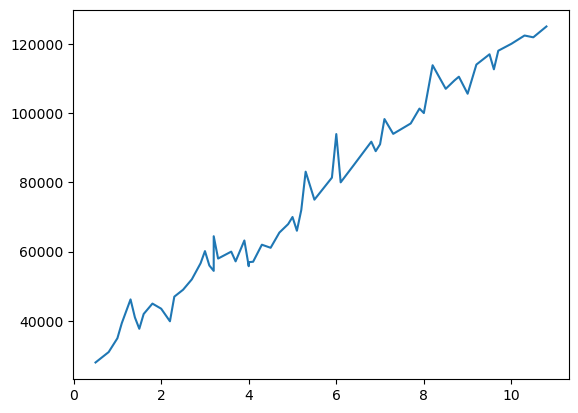

In [68]:
plt.plot(X,Y)

In [69]:
# normalizing the dataset for better rate of convergence
# also, mostly we use numpy arrays:

X = np.array(X)
Y = np.array(Y)

In [70]:
X

array([ 0.5,  0.8,  1. ,  1.1,  1.3,  1.4,  1.5,  1.6,  1.8,  2. ,  2.2,
        2.3,  2.5,  2.7,  2.9,  3. ,  3.1,  3.2,  3.2,  3.3,  3.6,  3.7,
        3.9,  4. ,  4. ,  4.1,  4.3,  4.5,  4.7,  4.9,  5. ,  5.1,  5.2,
        5.3,  5.5,  5.9,  6. ,  6.1,  6.4,  6.8,  6.9,  7. ,  7.1,  7.3,
        7.7,  7.9,  8. ,  8.2,  8.5,  8.7,  8.8,  9. ,  9.2,  9.5,  9.6,
        9.7, 10. , 10.3, 10.5, 10.8])

In [71]:
# let's normalize : x_new = (x_old - mean)/sd
# where sd = sqrt of variance

In [72]:
def mean(X):
    return np.sum(X)/len(X)

In [73]:
def variance(X):
    mean_val = mean(X)
    return (np.sum((X - mean_val)**2)/len(X))

In [74]:
def norm(X):
    mu = mean(X)
    var = variance(X)
    return (X - mu)/np.sqrt(var)

In [75]:
X_norm = norm(X)

In [76]:
X_norm

array([-1.63473615, -1.53152587, -1.46271902, -1.42831559, -1.35950874,
       -1.32510531, -1.29070189, -1.25629846, -1.18749161, -1.11868475,
       -1.0498779 , -1.01547447, -0.94666762, -0.87786077, -0.80905391,
       -0.77465049, -0.74024706, -0.70584363, -0.70584363, -0.67144021,
       -0.56822993, -0.5338265 , -0.46501965, -0.43061622, -0.43061622,
       -0.3962128 , -0.32740594, -0.25859909, -0.18979224, -0.12098538,
       -0.08658196, -0.05217853, -0.0177751 ,  0.01662832,  0.08543518,
        0.22304888,  0.25745231,  0.29185574,  0.39506601,  0.53267972,
        0.56708315,  0.60148657,  0.63589   ,  0.70469685,  0.84231056,
        0.91111741,  0.94552084,  1.01432769,  1.11753797,  1.18634483,
        1.22074825,  1.2895551 ,  1.35836196,  1.46157224,  1.49597566,
        1.53037909,  1.63358937,  1.73679965,  1.8056065 ,  1.90881678])

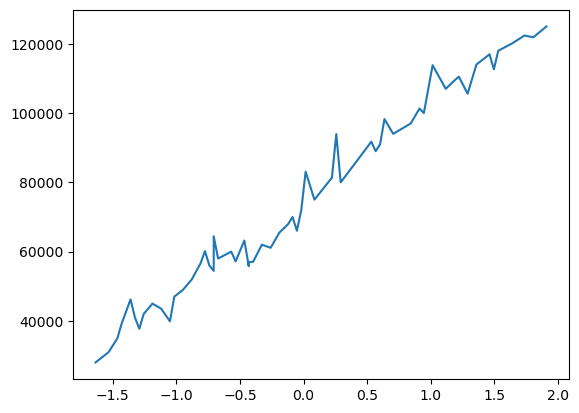

In [77]:
plt.plot(X_norm, Y)

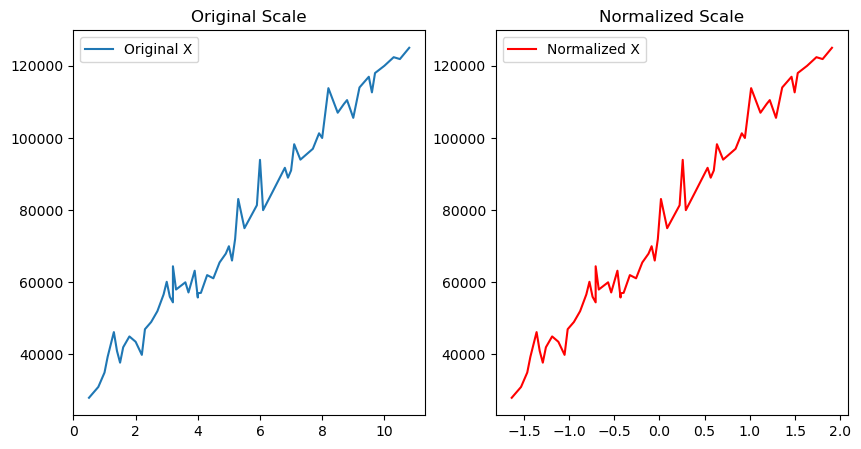

In [78]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(X, Y, label="Original X")
plt.title("Original Scale")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(X_norm, Y, label="Normalized X", color="red")
plt.title("Normalized Scale")
plt.legend()

plt.show()


In [79]:
# other way of directly calculating
# xnorm = (X - ds["YearsExperience"].mean()) / ds["YearsExperience"].std()
# xnorm """

In [80]:
import random

In [81]:
class SimpleLR:
    def __init__(self, learning_rate= 0.1, max_iter= 2000, threshold= 1e-6):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.threshold = threshold
        # for wt and bias, we will use random.uniform

        self.weight = random.uniform(-1,1)
        self.bias = random.uniform(-1,1)

    # now, fit fn that maintains a loss history and tells how the dataset
    # fits the model, also providing the loss history alongside
    # takes in X, Y, and fits the model with X and Y
    def fit(self, X, Y):
        n = len(X)
        loss_history = []
        iter = 0
        least_difference = []
        y_pred = (self.weight)* X + self.bias
        errors = Y - y_pred
        prev_loss = (1/(2*n))*(np.sum((errors)**2))
        loss_history.append(prev_loss)
        for i in range(self.max_iter):
            iter += 1
            w_grad = (1/n) * np.sum(errors * X)
            b_grad = (1/n) * np.sum(errors)

            self.weight += self.learning_rate * w_grad
            self.bias += self.learning_rate * b_grad
            y_pred = (self.weight)* X + self.bias
            errors = Y - y_pred
            curr_loss = (1/(2*n))*(np.sum((errors)**2))
            if(np.abs(curr_loss - prev_loss) < self.threshold):
                least_difference.append(curr_loss - prev_loss)
                break
            else:
                least_difference.append(curr_loss - prev_loss)
                prev_loss = curr_loss
                loss_history.append(prev_loss)
        return loss_history, least_difference, iter
    def letsplot(self, X, Y):
        y_pred = (self.weight)* X + self.bias
        plt.plot(X,Y)
        plt.plot(X, y_pred)


In [82]:
model = SimpleLR()

In [83]:
loss_history, least_difference, iter = model.fit(X_norm, Y)

In [84]:
loss_history

[3195543955.5338945,
 2590061021.488215,
 2099619844.9112146,
 1702362491.8838444,
 1380584035.9316747,
 1119943486.6104171,
 908824641.6601986,
 737818377.2505215,
 599303303.0786829,
 487106092.9994938,
 396226352.83535045,
 322613763.3023944,
 262987565.78070012,
 214690345.78812766,
 175569597.59414396,
 143881791.55701718,
 118214668.66694455,
 97424299.12598568,
 80584099.79780896,
 66943538.341985874,
 55894683.56276917,
 46945111.19160362,
 39695957.57095955,
 33824143.1382378,
 29067973.447733212,
 25215475.99842446,
 22094953.06448442,
 19567329.487993006,
 17519954.391034905,
 15861580.56249885,
 14518297.761384673,
 13430238.692482179,
 12548910.846671142,
 11835035.291564234,
 11256796.091927618,
 10788422.340221962,
 10409039.601340383,
 10101739.58284631,
 9852826.567866098,
 9651207.025732134,
 9487895.196603619,
 9355612.615009528,
 9248463.723918308,
 9161673.122134428,
 9091372.734689489,
 9034429.42085908,
 8988305.336656447,
 8950944.828452319,
 8920682.81680697,
 

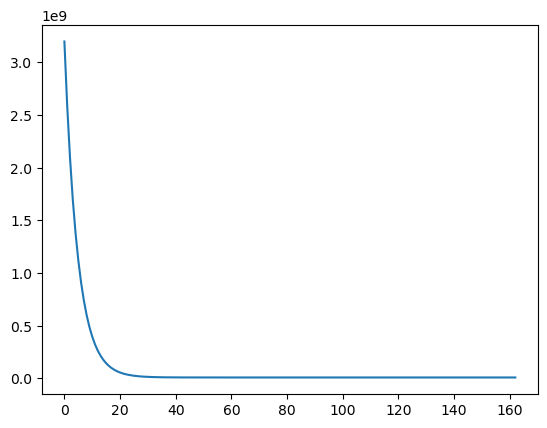

In [85]:
plt.plot(loss_history)

In [86]:
least_difference

[-605482934.0456796,
 -490441176.5770004,
 -397257353.0273702,
 -321778455.95216966,
 -260640549.3212576,
 -211118844.95021856,
 -171006264.40967703,
 -138515074.17183864,
 -112197210.07918912,
 -90879740.16414332,
 -73612589.53295606,
 -59626197.52169427,
 -48297219.99257246,
 -39120748.193983704,
 -31687806.03712678,
 -25667122.89007263,
 -20790369.540958866,
 -16840199.328176722,
 -13640561.455823086,
 -11048854.779216707,
 -8949572.371165544,
 -7249153.62064407,
 -5871814.432721756,
 -4756169.690504584,
 -3852497.449308753,
 -3120522.933940038,
 -2527623.5764914155,
 -2047375.0969581008,
 -1658373.8285360541,
 -1343282.8011141773,
 -1088059.0689024944,
 -881327.8458110373,
 -713875.5551069081,
 -578239.1996366158,
 -468373.7517056558,
 -379382.73888157867,
 -307300.0184940733,
 -248913.01498021185,
 -201619.5421339646,
 -163311.82912851498,
 -132282.5815940909,
 -107148.89109122008,
 -86790.6017838791,
 -70300.38744493946,
 -56943.3138304092,
 -46124.08420263231,
 -37360.5082041285

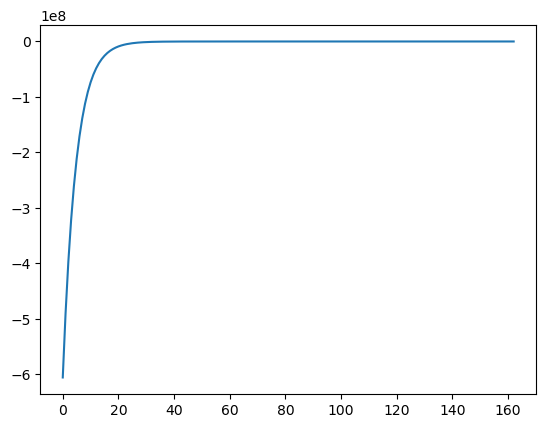

In [87]:
plt.plot(least_difference)

In [88]:
iter

163

In [89]:
# thus instead of max iteration value of 2000, it ran only 163 times
# as it meets the threshold value

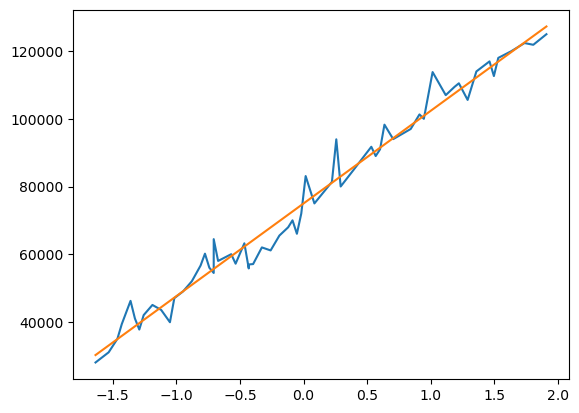

In [90]:
# this will give wrong answer :- model.letsplot(X,Y) 

model.letsplot(X_norm, Y)